In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [42]:
import os, shutil, pathlib

In [3]:
original_dir = pathlib.Path("C:/Users/Antec/Desktop/Python_Kurs/Bootcamp/Final Project/Data/mixed")
new_base_dir = pathlib.Path("C:/Users/Antec/Desktop/Python_Kurs/Bootcamp/Final Project/Data/new")

In [12]:
def make_subset(subset_name, start_index, end_index):
    for category in ("with_mask_", "without_mask_"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}{i+1}.jpg"
            for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

In [13]:
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [4]:
from tensorflow.keras.utils import image_dataset_from_directory

In [5]:
train_dataset = image_dataset_from_directory(
new_base_dir / "train",
image_size=(180, 180),
batch_size=32)
validation_dataset = image_dataset_from_directory(
new_base_dir / "validation",
image_size=(180, 180),
batch_size=32)
test_dataset = image_dataset_from_directory(
new_base_dir / "test",
image_size=(180, 180),
batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [7]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [8]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [9]:
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [ ]:
callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="convnet_from_scratch.keras",
save_best_only=True,
monitor="val_loss")
]

In [22]:
history = model.fit(
train_dataset,
epochs=30,
validation_data=validation_dataset,
callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 37s 578ms/step - loss: 0.5288 - accuracy: 0.8205 - val_loss: 0.2705 - val_accuracy: 0.9120
Epoch 2/30
63/63 [==============================] - 35s 557ms/step - loss: 0.2534 - accuracy: 0.9130 - val_loss: 0.2345 - val_accuracy: 0.9250
Epoch 3/30
63/63 [==============================] - 34s 546ms/step - loss: 0.2219 - accuracy: 0.9315 - val_loss: 0.2847 - val_accuracy: 0.9240
Epoch 4/30
63/63 [==============================] - 34s 544ms/step - loss: 0.2032 - accuracy: 0.9410 - val_loss: 0.2175 - val_accuracy: 0.9290
Epoch 5/30
63/63 [==============================] - 34s 544ms/step - loss: 0.1399 - accuracy: 0.9585 - val_loss: 0.2501 - val_accuracy: 0.9390
Epoch 6/30
63/63 [==============================] - 34s 545ms/step - loss: 0.1281 - accuracy: 0.9645 - val_loss: 0.1634 - val_accuracy: 0.9530
Epoch 7/30
63/63 [==============================] - 34s 544ms/step - loss: 0.1161 - accuracy: 0.9645 - val_loss: 0.1509 - val_accuracy: 0.9540

In [6]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [10]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 8s 129ms/step - loss: 0.3333 - accuracy: 0.9010
Test accuracy: 0.901


In [11]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
    )

In [24]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [27]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 39s 608ms/step - loss: 0.6656 - accuracy: 0.7735 - val_loss: 0.2530 - val_accuracy: 0.9300
Epoch 2/20
63/63 [==============================] - 38s 607ms/step - loss: 0.3158 - accuracy: 0.8915 - val_loss: 0.3114 - val_accuracy: 0.9000
Epoch 3/20
63/63 [==============================] - 38s 604ms/step - loss: 0.2409 - accuracy: 0.9125 - val_loss: 0.1883 - val_accuracy: 0.9420
Epoch 4/20
63/63 [==============================] - 38s 605ms/step - loss: 0.2082 - accuracy: 0.9255 - val_loss: 0.2447 - val_accuracy: 0.9450
Epoch 5/20
63/63 [==============================] - 38s 604ms/step - loss: 0.2200 - accuracy: 0.9300 - val_loss: 0.2945 - val_accuracy: 0.9410
Epoch 6/20
63/63 [==============================] - 38s 605ms/step - loss: 0.1760 - accuracy: 0.9405 - val_loss: 0.2050 - val_accuracy: 0.9400
Epoch 7/20
63/63 [==============================] - 38s 609ms/step - loss: 0.1798 - accuracy: 0.9470 - val_loss: 0.1741 - val_accuracy: 0.9450

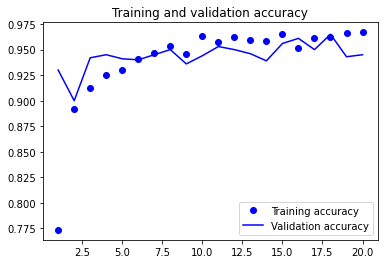

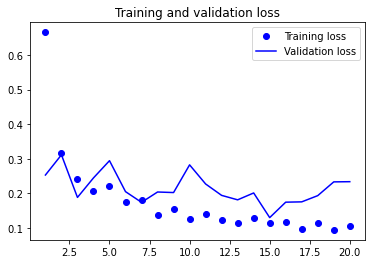

In [28]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [12]:
test_model2 = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 8s 128ms/step - loss: 0.3333 - accuracy: 0.9010
Test accuracy: 0.901


In [6]:
conv_base = keras.applications.vgg16.VGG16(
weights="imagenet",
include_top=False,
input_shape=(180, 180, 3))

In [7]:
import numpy as np
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

In [8]:
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

In [9]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

In [10]:
train_features.shape

(2000, 5, 5, 512)

In [11]:
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="feature_extraction.keras",
save_best_only=True,
monitor="val_loss")
]


history = model.fit(
train_features, train_labels,
epochs=20,
validation_data=(val_features,val_labels),
callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 2s 25ms/step - loss: 1.4076 - accuracy: 0.9755 - val_loss: 0.3682 - val_accuracy: 0.9920
Epoch 2/20
63/63 [==============================] - 2s 24ms/step - loss: 0.1756 - accuracy: 0.9955 - val_loss: 0.3500 - val_accuracy: 0.9930
Epoch 3/20
63/63 [==============================] - 1s 23ms/step - loss: 0.1169 - accuracy: 0.9980 - val_loss: 0.6671 - val_accuracy: 0.9900
Epoch 4/20
63/63 [==============================] - 1s 23ms/step - loss: 0.0273 - accuracy: 0.9995 - val_loss: 0.5140 - val_accuracy: 0.9920
Epoch 5/20
63/63 [==============================] - 1s 23ms/step - loss: 0.0408 - accuracy: 0.9990 - val_loss: 0.3476 - val_accuracy: 0.9940
Epoch 6/20
63/63 [==============================] - 1s 23ms/step - loss: 0.0220 - accuracy: 0.9990 - val_loss: 0.5522 - val_accuracy: 0.9920
Epoch 7/20
63/63 [==============================] - 1s 23ms/step - loss: 5.6680e-23 - accuracy: 1.0000 - val_loss: 0.5522 - val_accuracy: 0.9920
Epoch 8/2

In [12]:
test_model = keras.models.load_model("feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 0s 3ms/step - loss: 1.5191 - accuracy: 0.9860
Test accuracy: 0.986


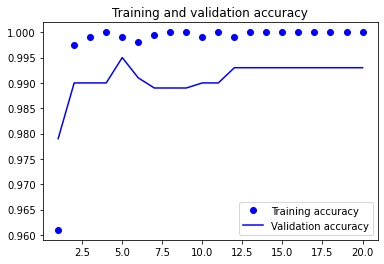

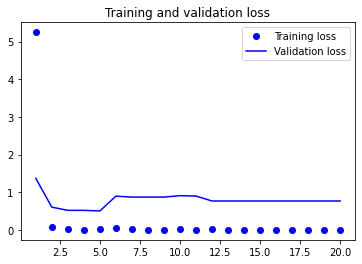

In [23]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
########### Does not recognize faces with masks##################################

In [16]:
from tensorflow.python.keras.layers import Layer, InputSpec

In [17]:
import tensorflow.python.keras.engine
import numpy as np

In [40]:
import mtcnn
from matplotlib import image
from matplotlib import pyplot
from PIL import Image

In [43]:
import os
print(os.getcwd())

C:\Users\Antec\Desktop\Python_Kurs\Bootcamp\ML2\Chollet


float32
(400, 400, 4)


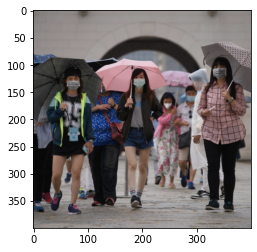

In [112]:
ima = image.imread('maksssksksss79.png',0)

print(ima.dtype)
print(ima.shape)
pyplot.imshow(ima)
pyplot.show()



float32
(400, 400, 3)


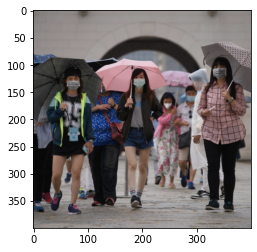

In [113]:
ima = ima[:,:,:3]
print(ima.dtype)
print(ima.shape)
pyplot.imshow(ima)
pyplot.show()

uint8
(148, 135, 3)


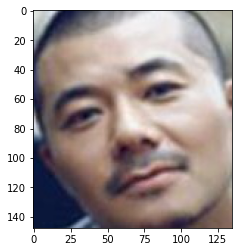

In [41]:
ima = image.imread('without_mask_8.jpg')

print(ima.dtype)
print(ima.shape)
pyplot.imshow(ima)
pyplot.show()


In [21]:
detector = mtcnn.MTCNN()
results = detector.detect_faces(ima)

In [22]:
results

[{'box': [2, 2, 129, 150],
  'confidence': 0.9998935461044312,
  'keypoints': {'left_eye': (36, 70),
   'right_eye': (85, 52),
   'nose': (65, 86),
   'mouth_left': (54, 122),
   'mouth_right': (101, 107)}}]

In [23]:
x1, y1, width, height = results[0]['box']
x2, y2 = x1 + width, y1 + height

In [24]:
face = ima[y1:y2, x1:x2]

In [25]:
image = Image.fromarray(face)
image = image.resize((180, 180))

face_array = np.asarray(image)

In [26]:
face_array.shape

(180, 180, 3)

In [51]:
# face_arrays = []
# for i in results:

#     x1, y1, width, height = results[1]['box']
#     x2, y2 = x1 + width, y1 + height
    
#     face = ima[y1:y2, x1:x2]
    
#     box = PIL.Image.fromarray(face)
#     box = box.resize((180, 180))
#     face_array[0] = np.asarray(box)
    

In [27]:
test = face_array.reshape(1,180,180,3)

In [33]:
output1 = conv_base.predict(test)
print(output1.shape)
output2 = model.predict(output1)
print(output2.shape)
output2

(1, 5, 5, 512)
(1, 1)


array([[1.]], dtype=float32)

In [35]:
res = model.predict(conv_base.predict(test))

In [38]:
res

array([[1.]], dtype=float32)

In [37]:
res[0]

array([1.], dtype=float32)

In [39]:
res[0][0]

1.0

In [31]:
a = np.array([[1]])

In [32]:
print(a)

[[1]]


In [1]:
import cv2
from cv2 import CascadeClassifier
import mediapipe as mp
from cv2 import rectangle
from cv2 import imshow
from cv2 import waitKey
from cv2 import destroyAllWindows

In [118]:
print(cv2.__version__)

4.5.5


In [19]:
#classifier = CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
classifier = mp.solutions.face_detection.FaceDetection()

# bboxes = classifier.detectMultiScale(ima)
# print bounding box for each detected face
for box in bboxes:
	print(box)

In [146]:
for box in bboxes:
	# extract
	x, y, width, height = box
	x2, y2 = x + width, y + height
	# draw a rectangle over the pixels
	rectangle(ima, (x, y), (x2, y2), (0,0,255), 1)

In [147]:
imshow('face detection', ima)
# keep the window open until we press a key
waitKey(0)
# close the window
destroyAllWindows()

In [94]:
bboxes[0]

array([ 47, 426,  53,  53])

In [96]:
x1, y1, width, height = bboxes[0]
x2, y2 = x1 + width, y1 + height

In [ ]:
# show the image
imshow('face detection', pixels)
# keep the window open until we press a key
waitKey(0)
# close the window
destroyAllWindows()